# Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
import sklearn
import math
from datetime import datetime

# Expolarity data analysis

In [5]:
data = pd.read_csv(r"supermarket_sales.csv")
data_frame = pd.DataFrame(data)

In [6]:
data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [7]:
data_frame.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [8]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# Change the type of date colum to date time


In [9]:
data_frame["Time"] = data_frame["Time"].astype(str)
data_frame["Date"] = data_frame["Date"].astype(str)

# Now, perform the addition operation
data_frame["DateTime"] = pd.to_datetime(data_frame["Date"] + " " + data_frame["Time"])
data_frame.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                               object
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
DateTime                   datetime64[ns]
dtype: object

In [10]:
data_frame["DateTime"] = data_frame["DateTime"].dt.strftime("%Y-%m-%d %H:%M")
print(data_frame["DateTime"])

0      2019-01-05 13:08
1      2019-03-08 10:29
2      2019-03-03 13:23
3      2019-01-27 20:33
4      2019-02-08 10:37
             ...       
995    2019-01-29 13:46
996    2019-03-02 17:16
997    2019-02-09 13:22
998    2019-02-22 15:33
999    2019-02-18 13:28
Name: DateTime, Length: 1000, dtype: object


In [11]:
data_frame = data_frame.drop(["Date", "Time"], axis=1)

In [12]:
data_frame.sample()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,DateTime
833,528-14-9470,A,Yangon,Member,Male,Health and beauty,91.3,1,4.565,95.865,Ewallet,91.3,4.761905,4.565,9.2,2019-02-14 14:42


# correct the outliers values


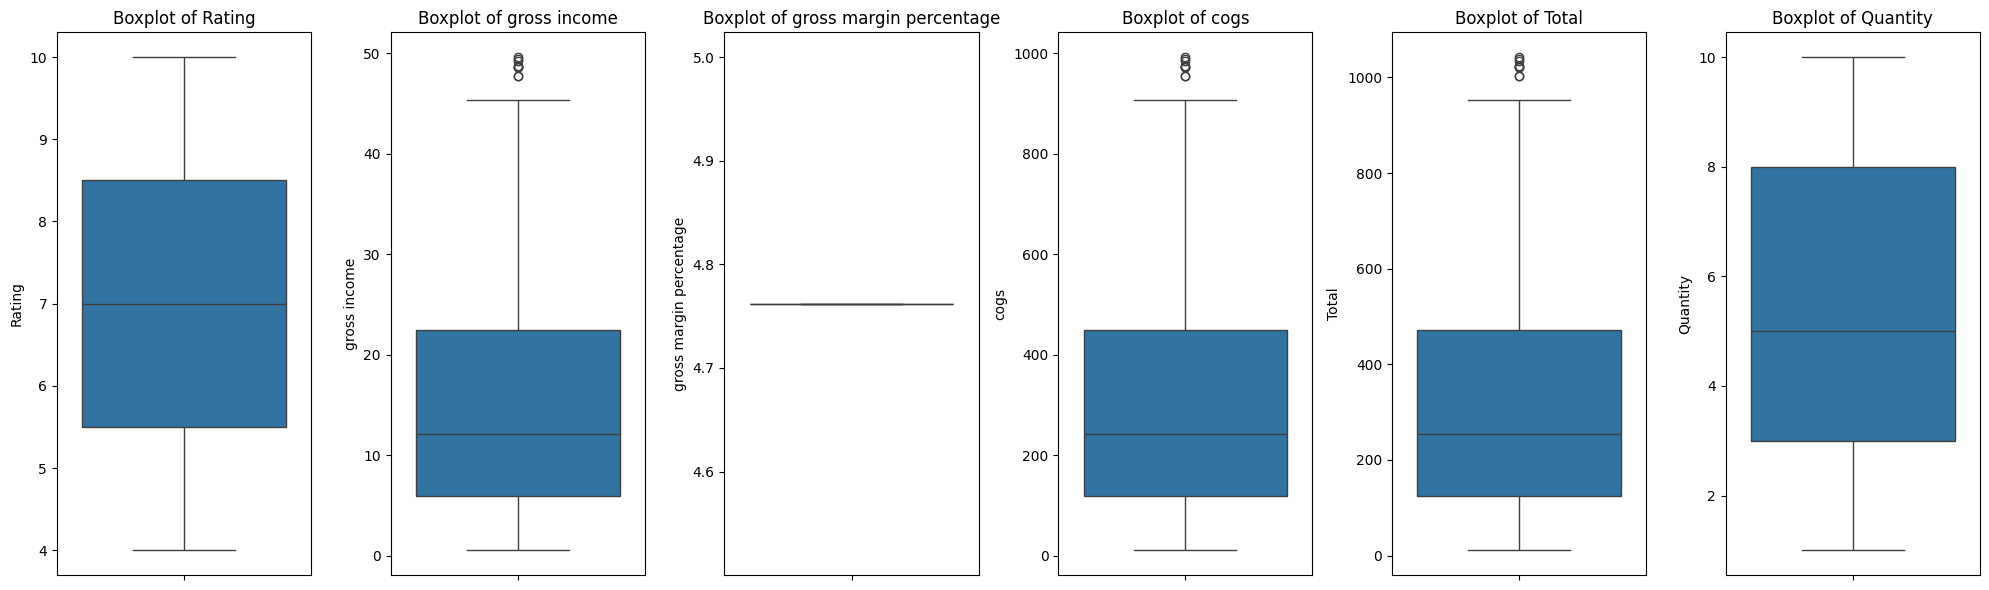

In [13]:
columns_to_plot = [
    "Rating",
    "gross income",
    "gross margin percentage",
    "cogs",
    "Total",
    "Quantity",
]

num_plots = len(columns_to_plot)

num_cols_per_row = num_plots

num_rows = 1
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(20, 6))

axes = axes.flatten()

for i, (column, ax) in enumerate(zip(columns_to_plot, axes), 1):
    sns.boxplot(y=data_frame[column], ax=ax)
    ax.set_title(f"Boxplot of {column}")
    ax.set_ylabel(column)

for j in range(i, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

In [14]:
data_frame["gross income"] = data_frame["gross income"].apply(
    lambda x: 45 if x > 45 else x
)
data_frame["cogs"] = data_frame["cogs"].apply(lambda x: 900 if x > 900 else x)

data_frame["Total"] = data_frame["Total"].apply(lambda x: 1000 if x > 1000 else x)

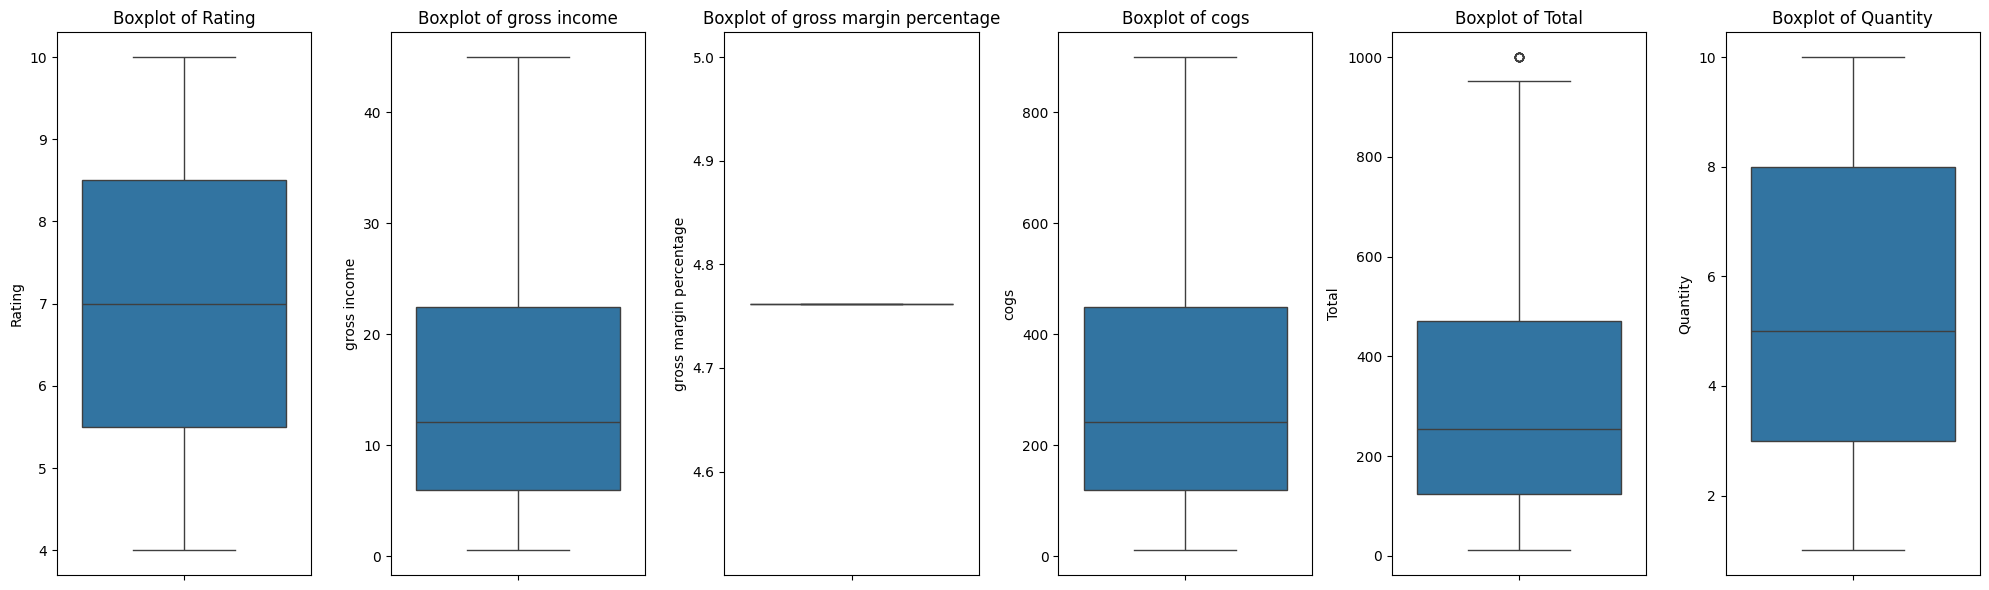

In [15]:
columns_to_plot = [
    "Rating",
    "gross income",
    "gross margin percentage",
    "cogs",
    "Total",
    "Quantity",
]

num_plots = len(columns_to_plot)

num_cols_per_row = num_plots

num_rows = 1
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(20, 6))

axes = axes.flatten()

for i, (column, ax) in enumerate(zip(columns_to_plot, axes), 1):
    sns.boxplot(y=data_frame[column], ax=ax)
    ax.set_title(f"Boxplot of {column}")
    ax.set_ylabel(column)

for j in range(i, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

# finding the null values   

In [16]:
cols = data_frame.columns
data_frame[cols].isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
DateTime                   0
dtype: int64

# finding the duplicated values

In [17]:
data_frame.duplicated().sum()

0

# finding the statistics about the data

In [18]:
data_frame.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.755309,306.903080,4.761905,15.345154,6.97270
std,26.494628,2.923431,11.708825,245.288379,232.324591,0.000000,11.616230,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.497500,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.760000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.905000,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1000.000000,900.000000,4.761905,45.000000,10.00000


# categorical columns

In [19]:
categorical_columns = [
    cname for cname in data_frame.columns if data_frame[cname].dtype == "object"
]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment',
 'DateTime']

# finding the correlation between quantative values

In [20]:
data_frame[
    [
        "Rating",
        "gross income",
        "gross margin percentage",
        "cogs",
        "Total",
        "Quantity",
        "Tax 5%",
        "Unit price",
    ]
].corr()

,Rating,gross income,gross margin percentage,cogs,Total,Quantity,Tax 5%,Unit price
Rating,1.000000,-0.035626,NaN,-0.035626,-0.036319,-0.015815,-0.036442,-0.008778
gross income,-0.035626,1.000000,NaN,1.000000,0.999789,0.706606,0.999559,0.634353
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cogs,-0.035626,1.000000,NaN,1.000000,0.999789,0.706606,0.999559,0.634353
Total,-0.036319,0.999789,NaN,0.999789,1.000000,0.705902,0.999949,0.634120
Quantity,-0.015815,0.706606,NaN,0.706606,0.705902,1.000000,0.705510,0.010778
Tax 5%,-0.036442,0.999559,NaN,0.999559,0.999949,0.705510,1.000000,0.633962
Unit price,-0.008778,0.634353,NaN,0.634353,0.634120,0.010778,0.633962,1.000000


# data Exploration and Exploration

In [21]:
def plotScatterMatrix(df, width, height):
    # Set the figure size
    plt.figure(figsize=(width, height))

    # Create the scatter matrix plot using Seaborn
    sns.pairplot(df)

    # Display the plot
    plt.show()


# Replace df1 with your DataFrame name
plotScatterMatrix(data_frame, 20, 10)

<Figure size 2000x1000 with 0 Axes>

KeyboardInterrupt: 

# show correlation matrix

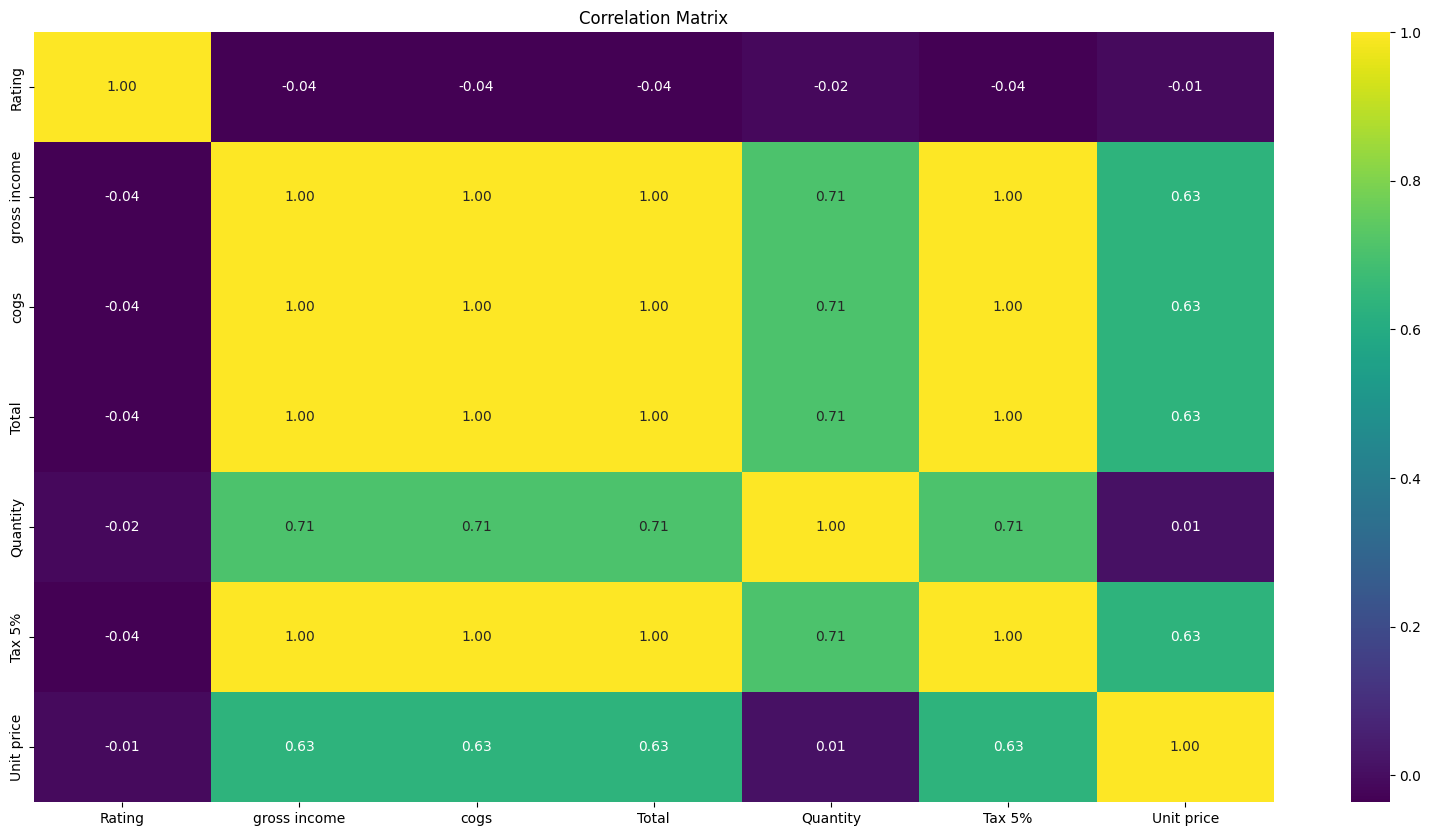

In [ ]:
df = data_frame[
    [
        "Rating",
        "gross income",
        "cogs",
        "Total",
        "Quantity",
        "Tax 5%",
        "Unit price",
    ]
]


def plotCorrelationMatrix(df, figsize):
    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Set the figure size
    plt.figure(figsize=figsize)

    # Create the heatmap with a different colormap (viridis)
    sns.heatmap(corr_matrix, annot=True, cmap="viridis", fmt=".2f")

    # Add title
    plt.title("Correlation Matrix")

    # Display the plot
    plt.show()


# Replace df1 with your DataFrame name
plotCorrelationMatrix(df, (20, 10))

# product line list

In [ ]:
product_line = data_frame["Product line"].unique()
print(product_line)

['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']


# exploring number of transaction by each branch.

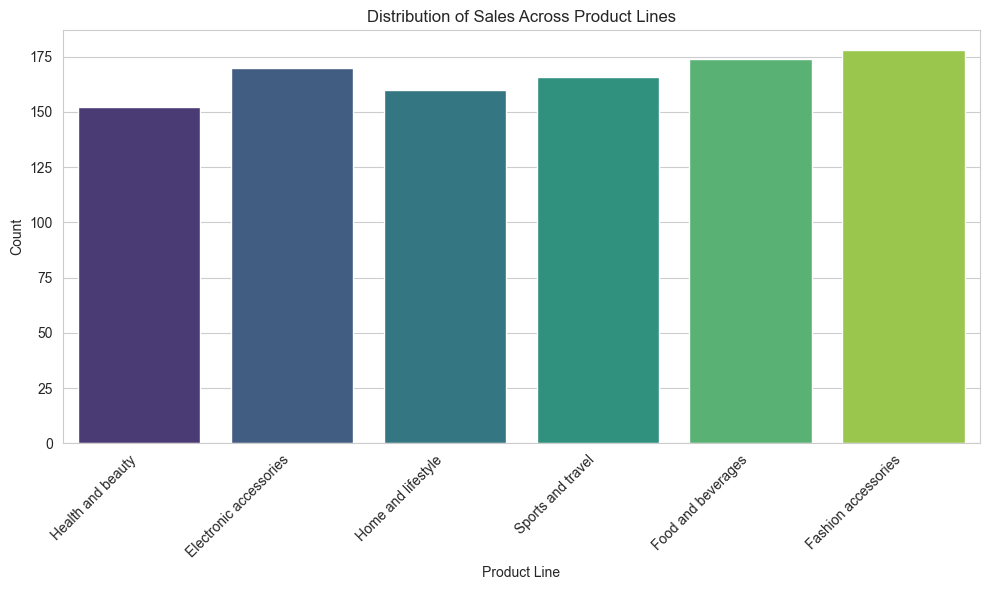

In [ ]:
# Set the style of the plot
sns.set_style("whitegrid")

# Plot the distribution of sales across different product lines
plt.figure(figsize=(10, 6))
sns.countplot(data=data_frame, x="Product line", palette="viridis")
plt.title("Distribution of Sales Across Product Lines")
plt.xlabel("Product Line")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# most sold product line by number of transaction

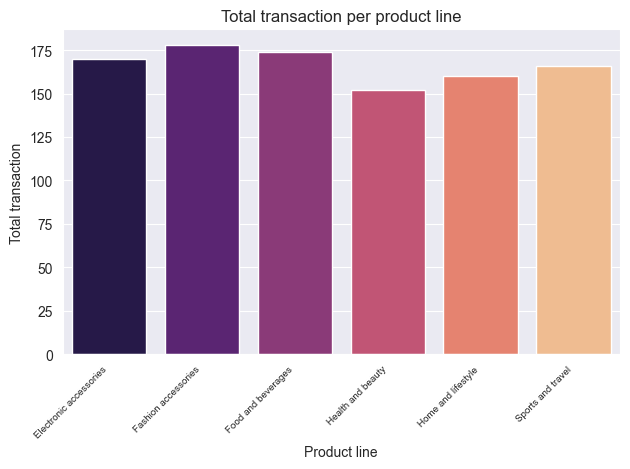

In [ ]:
product_line = data_frame.groupby("Product line")["Invoice ID"].count().reset_index()
sns.set_style("darkgrid")
sns.barplot(data=product_line, x="Product line", y="Invoice ID", palette="magma")
plt.xticks(rotation=45, fontsize=7, ha="right")
plt.xlabel("Product line")
plt.ylabel("Total transaction")
plt.title("Total transaction per product line")
plt.tight_layout()
plt.show()

# checking which product line has most total gross income

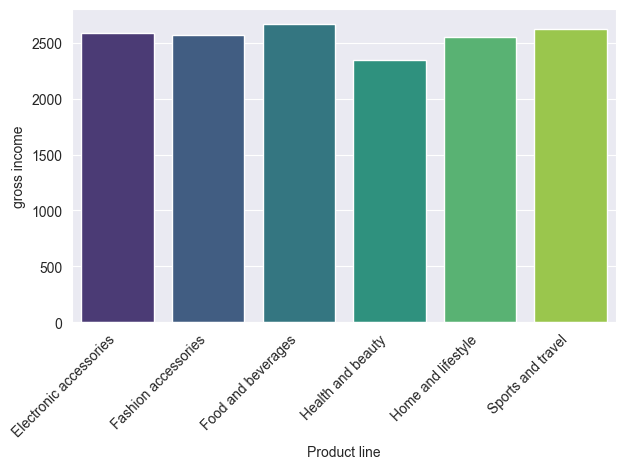

In [ ]:
gross_income_by_product = (
    data_frame.groupby("Product line")["gross income"].sum().reset_index()
)
sns.barplot(
    data=gross_income_by_product, x="Product line", y="gross income", palette="viridis"
)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# gross income by branch

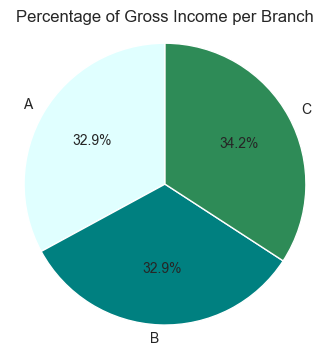

In [ ]:
total_gross_income_per_branch = data_frame.groupby("Branch")["gross income"].sum()

# Plotting a pie chart
sns.set_style("darkgrid")
plt.figure(figsize=(4, 4))  # Adjust figure size if needed
plt.pie(
    total_gross_income_per_branch,
    labels=total_gross_income_per_branch.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=["lightcyan", "teal", "seagreen"],
)
plt.title("Percentage of Gross Income per Branch")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# total sales 200 to all data day

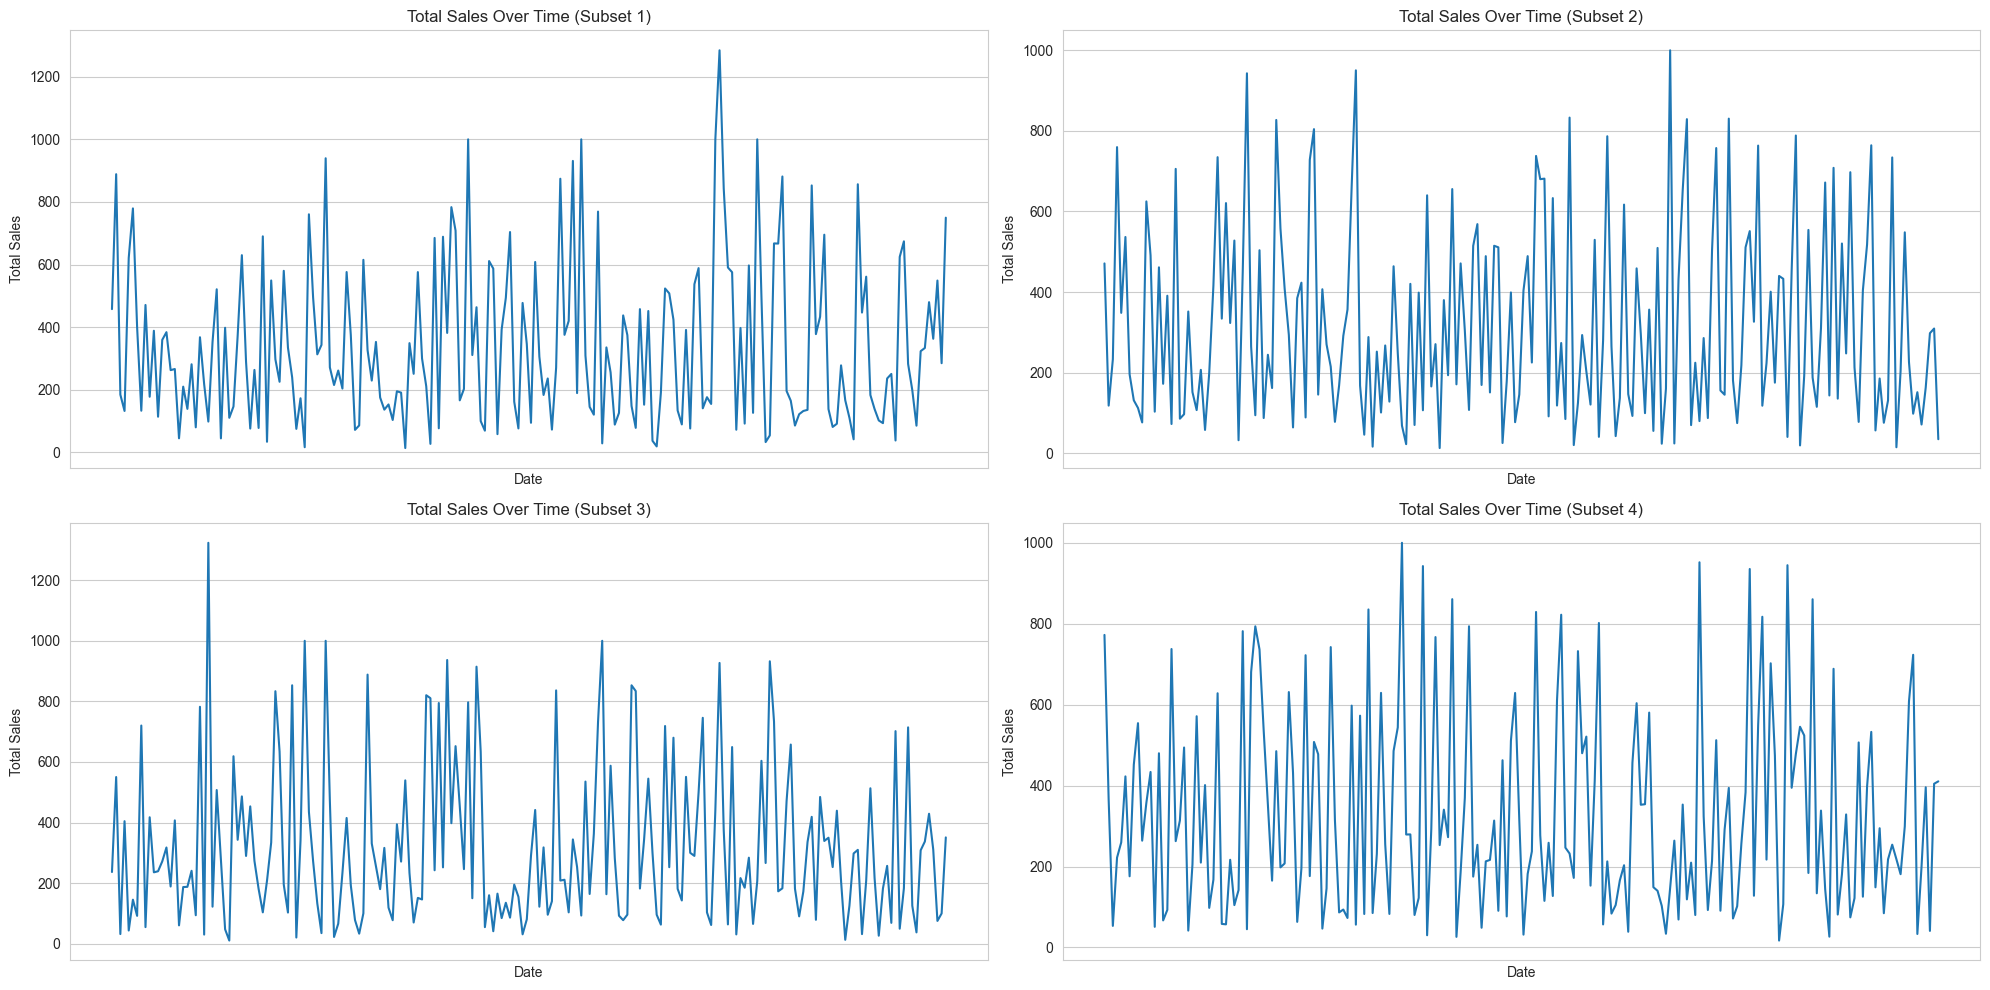

In [ ]:
# Group the data by "DateTime" and calculate the total sales
sales_per_day = data_frame.groupby("DateTime")["Total"].sum().reset_index()

# Set the style of the plot
sns.set_style("whitegrid")

# Define the number of rows to plot in each iteration
plot_interval = 200

# Calculate the total number of iterations
num_iterations = len(sales_per_day) // plot_interval

# Calculate the number of rows and columns for subplots
nrows = (num_iterations + 1) // 2
ncols = 2

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10))

# Plot each subset of data
for i in range(num_iterations):
    start_index = i * plot_interval
    end_index = (i + 1) * plot_interval
    subset = sales_per_day[start_index:end_index]

    row = i // ncols
    col = i % ncols

    sns.lineplot(data=subset, x="DateTime", y="Total", ax=axes[row, col])
    axes[row, col].set_title(f"Total Sales Over Time (Subset {i+1})")
    axes[row, col].set_xlabel("Date")
    axes[row, col].set_ylabel("Total Sales")
    axes[row, col].set_xticks([])  # Remove x-axis ticks
    axes[row, col].set_xticklabels([])  # Remove x-axis labels

# Adjust layout
plt.tight_layout()
plt.show()

# transaction per payment type

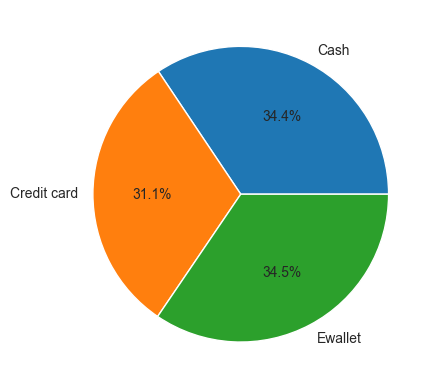

In [ ]:
transaction_per_payment_type = data_frame.groupby("Payment")["Invoice ID"].count()
plt.pie(
    transaction_per_payment_type,
    labels=transaction_per_payment_type.index,
    autopct="%1.1f%%",
)
plt.show()

# quantities sold per product line

In [ ]:
quantities_sold_per_product = (
    data_frame.groupby("Product line")["Quantity"].sum().reset_index()
)
quantities_sold_per_product

,Product line,Quantity
0,Electronic accessories,971
1,Fashion accessories,902
2,Food and beverages,952
3,Health and beauty,854
4,Home and lifestyle,911
5,Sports and travel,920


# average rating per product line

In [ ]:
rating_per_product_line = (
    data_frame.groupby("Product line")["Rating"].mean().reset_index()
)
rating_per_product_line

,Product line,Rating
0,Electronic accessories,6.924706
1,Fashion accessories,7.029213
2,Food and beverages,7.113218
3,Health and beauty,7.003289
4,Home and lifestyle,6.837500
5,Sports and travel,6.916265


# male and female customers spent money based on different product categories.

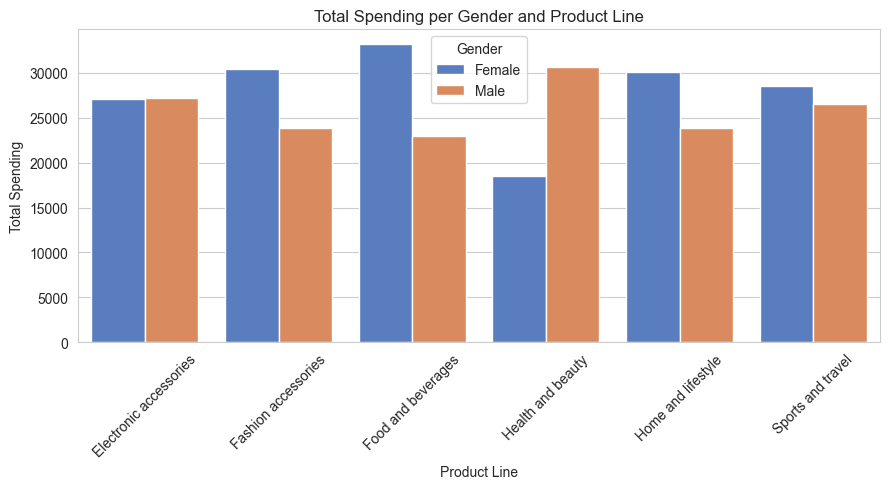

In [ ]:
total_spending_per_gender = (
    data.groupby(["Gender", "Product line"])["Total"].sum().reset_index()
)


plt.figure(figsize=(9, 5))
sns.barplot(
    data=total_spending_per_gender,
    x="Product line",
    y="Total",
    hue="Gender",
    palette="muted",
)
plt.xlabel("Product Line")
plt.ylabel("Total Spending")
plt.title("Total Spending per Gender and Product Line")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

# Quantity Distribution by Product Line

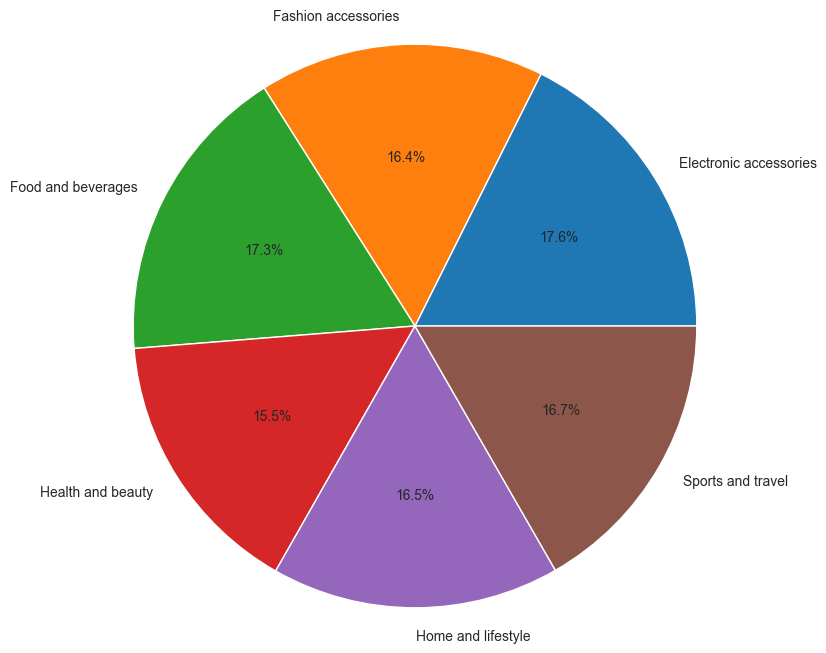

In [ ]:
product_line_quantity = (
    data_frame.groupby("Product line")["Quantity"].sum().reset_index()
)
product_line_quantity

plt.figure(figsize=(8, 8))
plt.pie(
    product_line_quantity["Quantity"],
    labels=product_line_quantity["Product line"],
    autopct="%1.1f%%",
)
plt.axis("equal")
plt.show()

# convert on date time

In [ ]:
# Define a function to extract hour from datetime string
def extract_hour(datetime_str):
    datetime_obj = datetime.strptime(datetime_str, "%Y-%m-%d %H:%M")
    return datetime_obj.hour


# Apply the function to the "DateTime" column to create the "Hour" column
data_frame["Hour"] = data_frame["DateTime"].apply(extract_hour)

# average Quantity Sold by Product Line Across All Working Hours

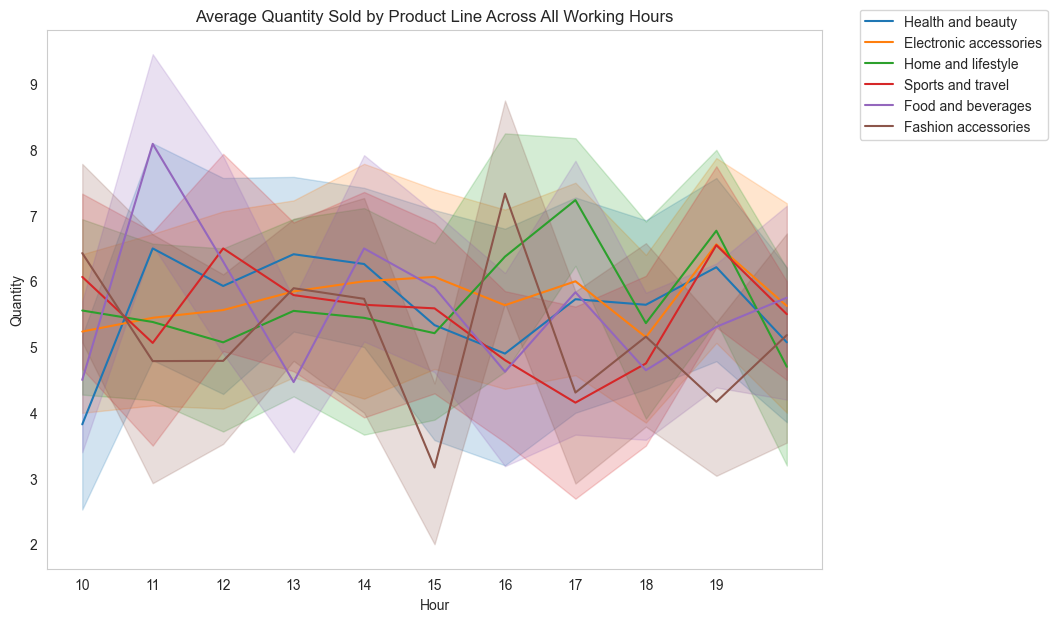

In [ ]:
# Plot the data
plt.figure(figsize=(10, 7))
sns.lineplot(
    x="Hour",
    y="Quantity",
    data=data_frame,
    hue="Product line",  # Corrected: changed "Product_line" to "Product line"
    estimator=np.mean,
)

plt.xticks(range(10, 20))  # Set x-axis ticks for each hour
plt.legend(bbox_to_anchor=(1.3, 1.05))
plt.title("Average Quantity Sold by Product Line Across All Working Hours")
plt.grid()
plt.show()

In [ ]:
data_frame.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,DateTime,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37,10


# Number of Sales of Each Branch by the Hour

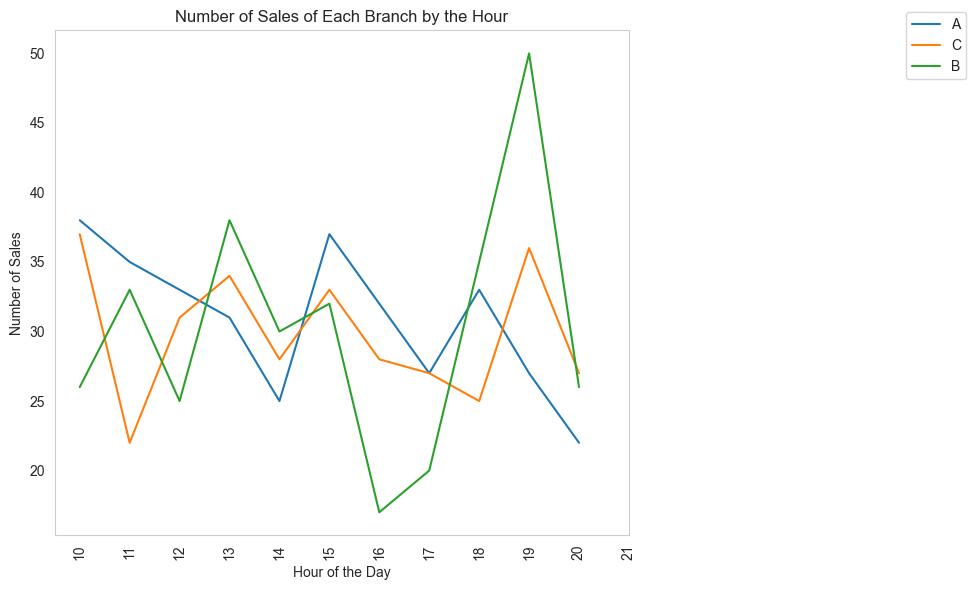

In [ ]:
sales = data_frame.groupby(["Branch", "Hour"])["Invoice ID"].count()

# Get unique branch names
unique_branches = data_frame["Branch"].unique()

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot sales data for each branch
for branch in unique_branches:
    sales[branch].plot(label=branch)

plt.xticks(range(10, 22), rotation="vertical")  # Adjust the range for all hours
plt.legend(bbox_to_anchor=(1.6, 1.05))
plt.grid()
plt.title("Number of Sales of Each Branch by the Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Sales")
plt.tight_layout()
plt.show()

# sum statistic for each branch

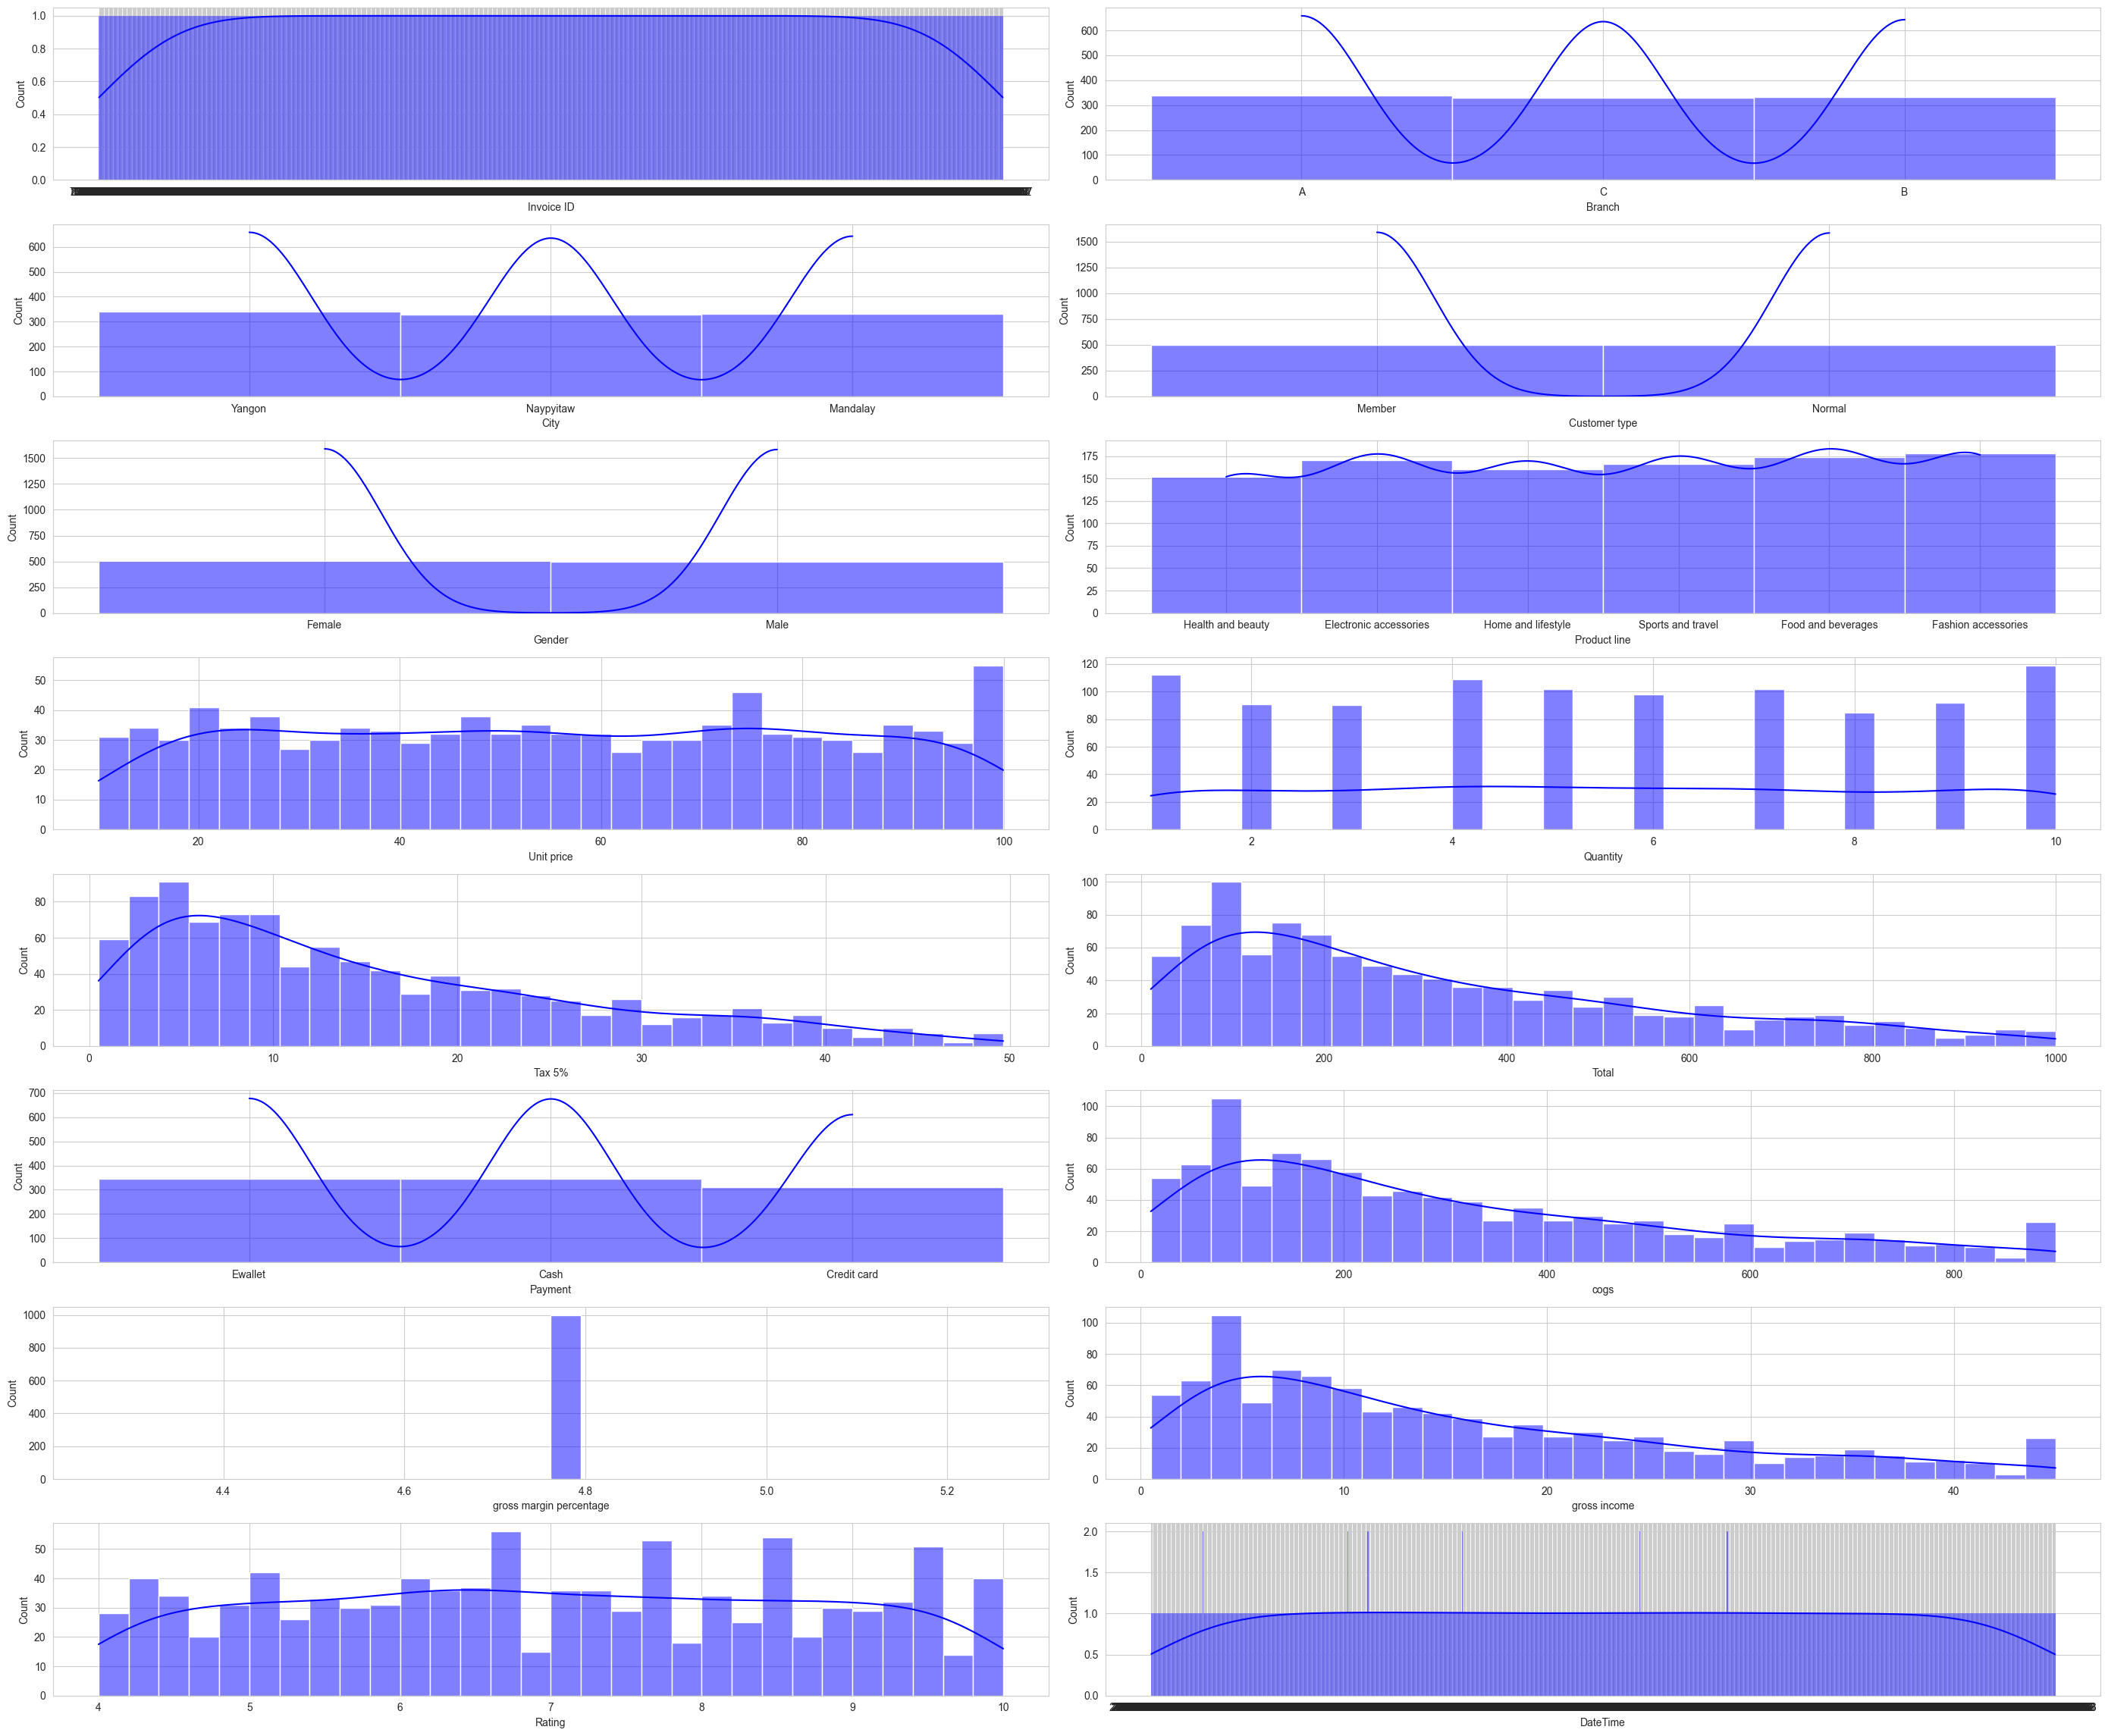

In [ ]:
plt.figure(figsize=(28, 23))

# Calculate the number of rows needed based on the number of columns
num_cols = 2
num_rows = (len(cols) + num_cols - 1) // num_cols

for i, col in enumerate(cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data=data_frame, x=col, kde=True, bins=30, color="blue")

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()

# Average Rating of Each Product Line

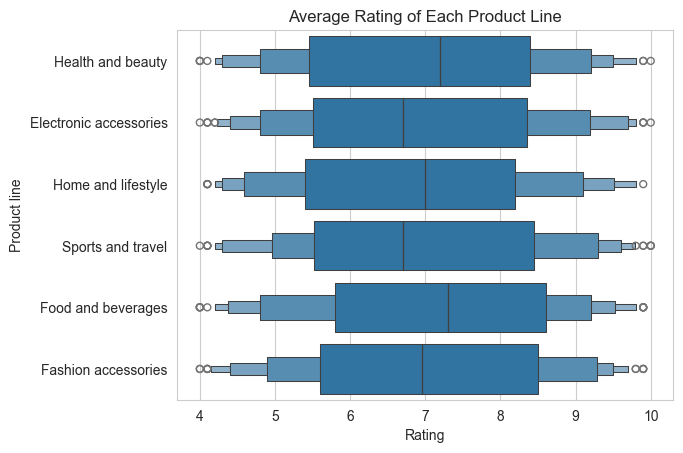

In [ ]:
sns.boxenplot(y="Product line", x="Rating", data=data_frame)
plt.title("Average Rating of Each Product Line")
plt.show()

# Customer type average spendage with gender

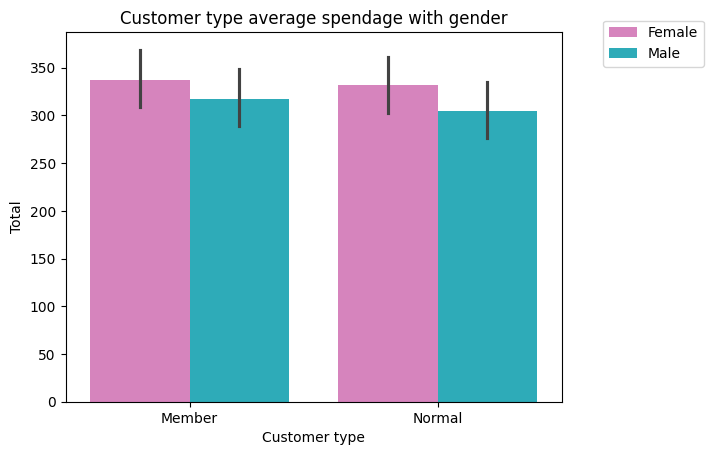

In [ ]:
sns.barplot(
    x="Customer type",
    y="Total",
    data=data_frame,
    estimator=np.average,
    hue="Gender",
    palette=["tab:pink", "tab:cyan"],
)
plt.legend(bbox_to_anchor=(1.3, 1.05))
plt.title("Customer type average spendage with gender")
plt.show()

In [ ]:
data_frame.groupby(["Customer type"]).agg({"Total": "sum"})

,Total
Customer type,
Member,164125.629
Normal,158629.680


Text(0.5, 1.0, 'Customer Type')

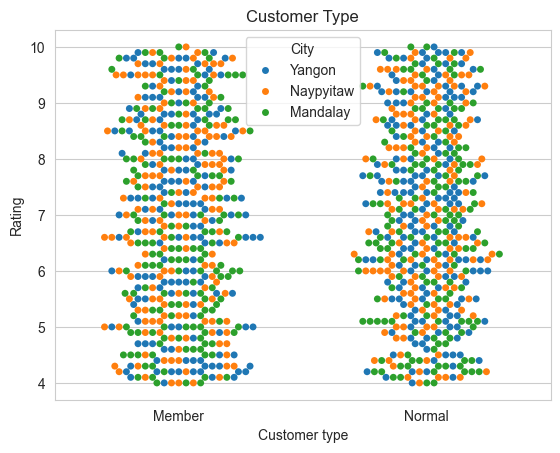

In [ ]:
sns.swarmplot(x="Customer type", y="Rating", hue="City", data=data_frame).set_title(
    "Customer Type"
)

# average total to ever gender

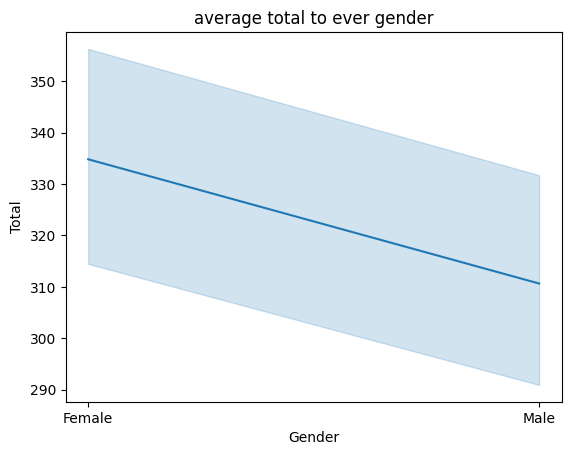

In [ ]:
genderCount = sns.lineplot(x="Gender", y="Total", data=data_frame).set_title(
    "average total to ever gender"
)

# Distribution of Customer type Level Codes

<Figure size 800x600 with 0 Axes>

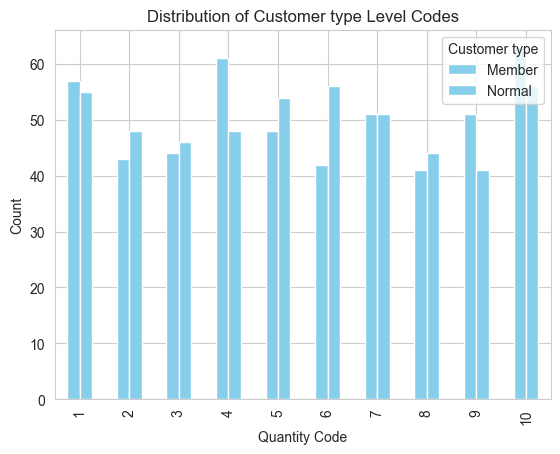

In [ ]:
Quantity_CT = pd.crosstab(data_frame["Quantity"], data_frame["Customer type"])
plt.figure(figsize=(8, 6))
Quantity_CT.plot(kind="bar", color="skyblue")
plt.title("Distribution of Customer type Level Codes")
plt.xlabel("Quantity Code")
plt.ylabel("Count")
plt.show()

In [ ]:
def extract_month(datetime_str):
    datetime_obj = datetime.strptime(datetime_str, "%Y-%m-%d %H:%M")
    return datetime_obj.month


# Apply the function to the "DateTime" column to create the "Month" column
data_frame["Month"] = data_frame["DateTime"].apply(extract_month)

# Average Rating of each branch every month

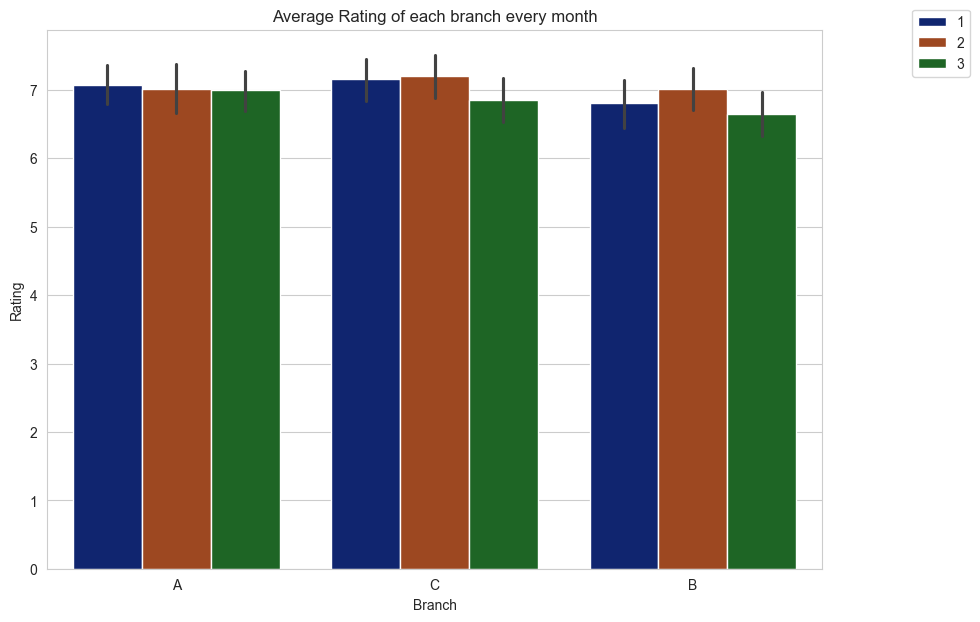

In [ ]:
palette_color = sns.color_palette("dark")
plt.figure(figsize=(10, 7))
sns.barplot(
    x="Branch",
    y="Rating",
    data=data_frame,
    estimator=np.mean,
    hue="Month",
    palette=palette_color,
)

plt.title("Average Rating of each branch every month")
plt.legend(bbox_to_anchor=(1.2, 1.05))
plt.show()

In [ ]:
sum_hour = data_frame.groupby("Hour").count()
sum_hour

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,DateTime,Month
Hour,,,,,,,,,,,,,,,,,
10,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101
11,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90
12,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89
13,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103
14,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83
15,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102
16,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77
17,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74
18,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93


In [ ]:
avg_rating = data_frame.groupby("Hour")["Rating"].mean()
avg_rating

Hour
10    7.098020
11    6.806667
12    7.300000
13    7.030097
14    6.934940
15    6.876471
16    6.859740
17    6.939189
18    7.187097
19    6.716814
20    6.977333
Name: Rating, dtype: float64

In [ ]:
sales_gen = data_frame.groupby(["Gender", "Product line"]).size().unstack()
sales_gen

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Gender,,,,,,
Female,84,96,90,64,79,88
Male,86,82,84,88,81,78


# Count of Sales by Hour

Text(0, 0.5, 'Count')

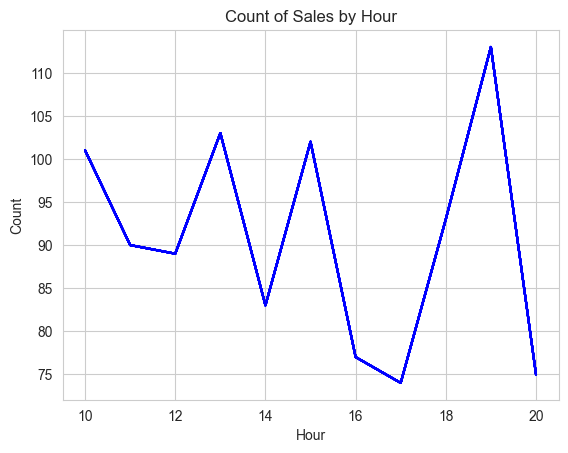

In [ ]:
plt.plot(sum_hour.index, sum_hour.values, color="blue")
plt.title("Count of Sales by Hour")
plt.xlabel("Hour")
plt.ylabel("Count")

# Average Rating by Hou

Text(0, 0.5, 'Average Rating')

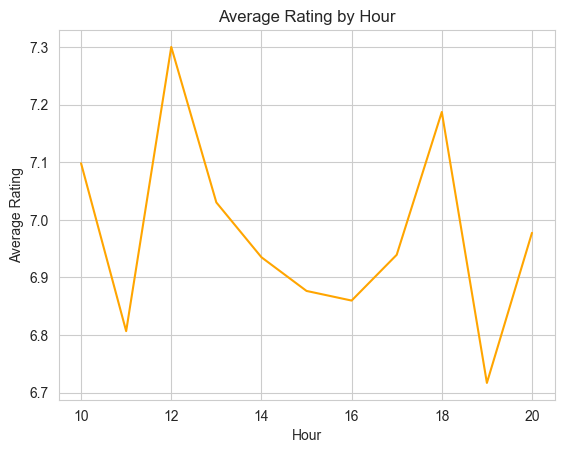

In [ ]:
plt.plot(avg_rating.index, avg_rating.values, color="orange")
plt.title("Average Rating by Hour")
plt.xlabel("Hour")
plt.ylabel("Average Rating")

# statistic of changes in brach Quantity by  month

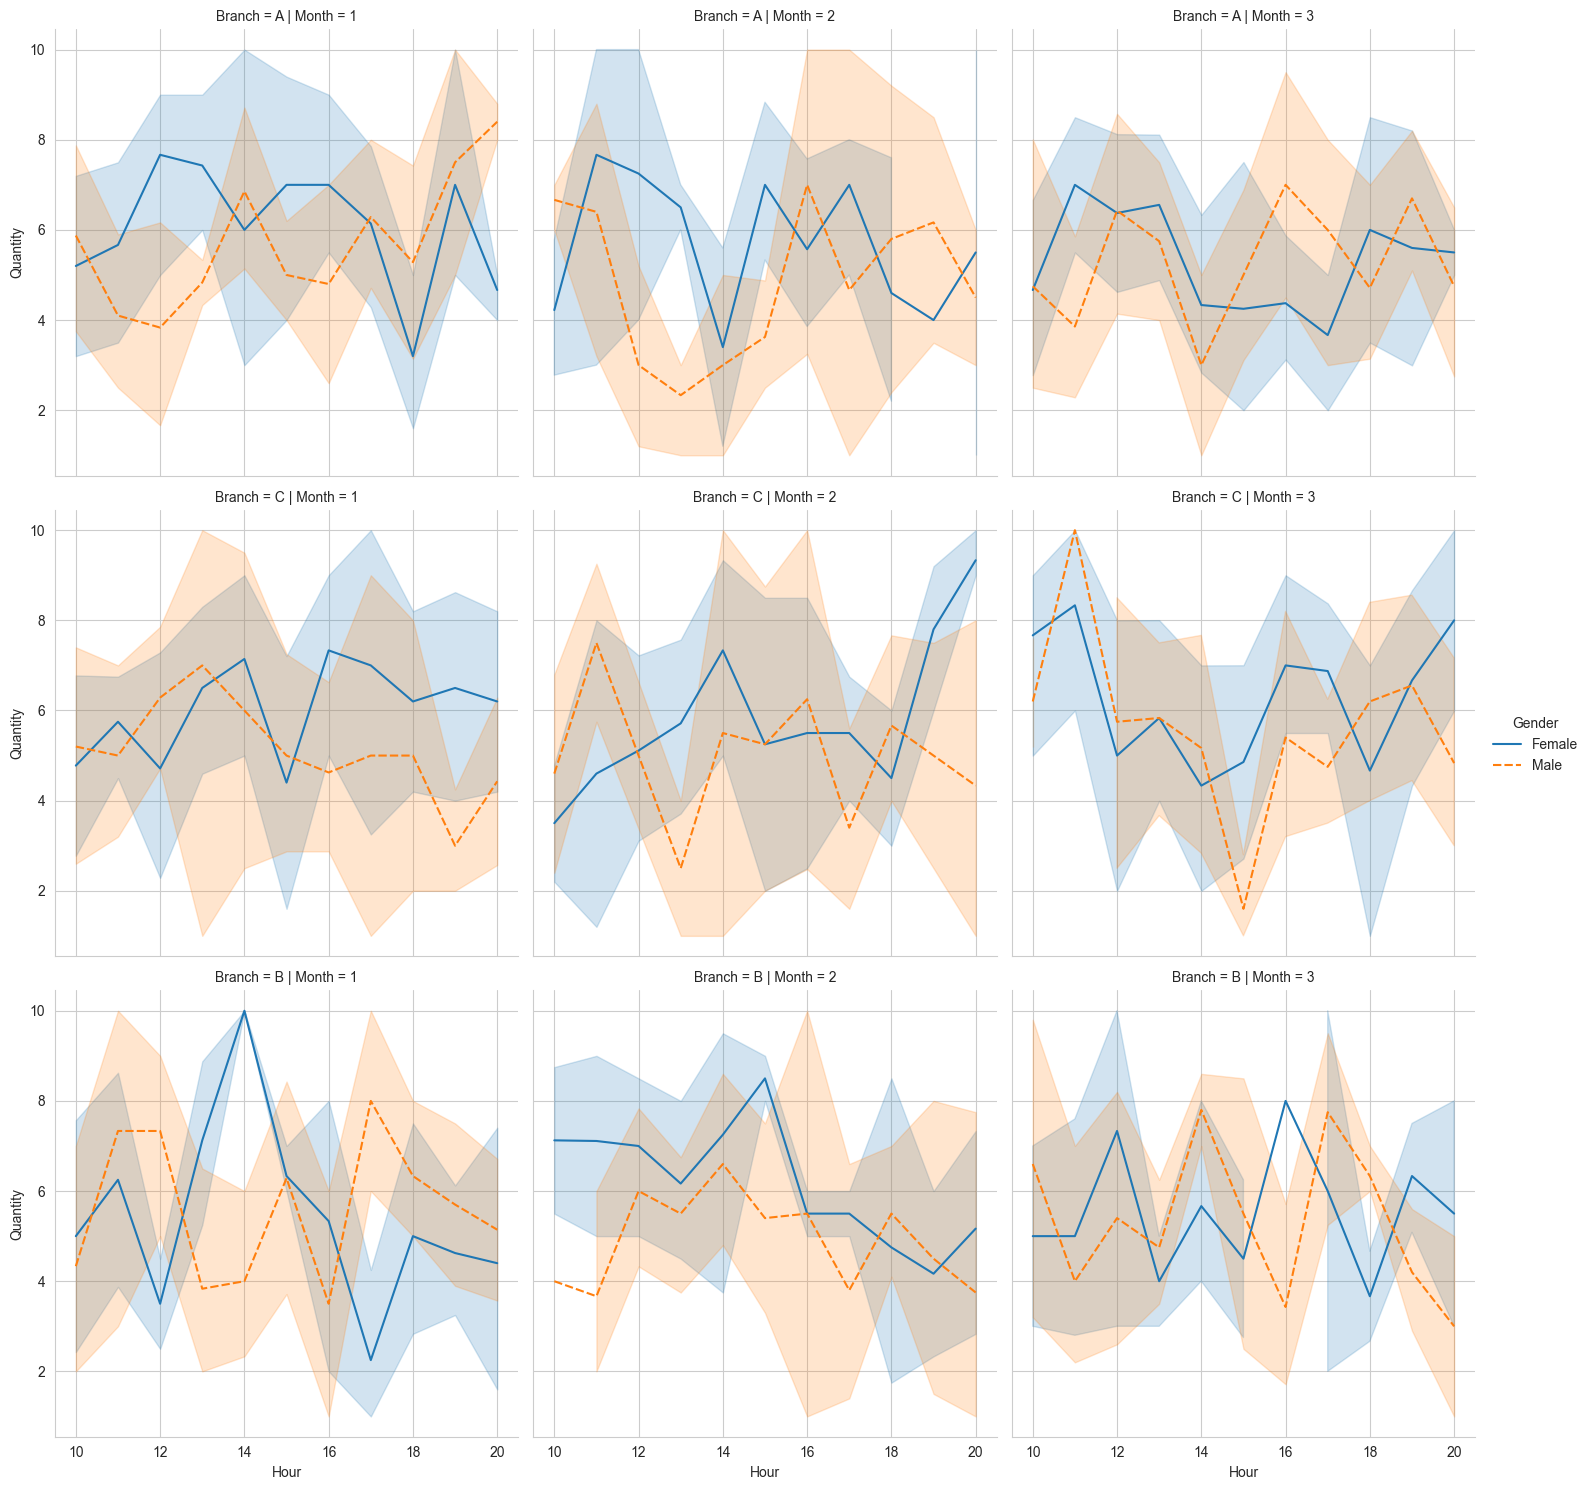

In [ ]:
genderCount = sns.relplot(
    x="Hour",
    y="Quantity",
    col="Month",
    row="Branch",
    kind="line",
    hue="Gender",
    style="Gender",
    data=data_frame,
)

# statistics between gender and product total  and product types 

<Axes: xlabel='Total', ylabel='Product line'>

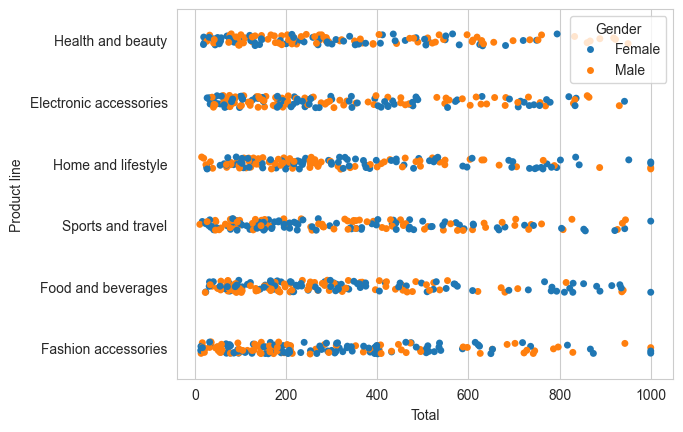

In [ ]:
sns.stripplot(y="Product line", x="Total", hue="Gender", data=data_frame)

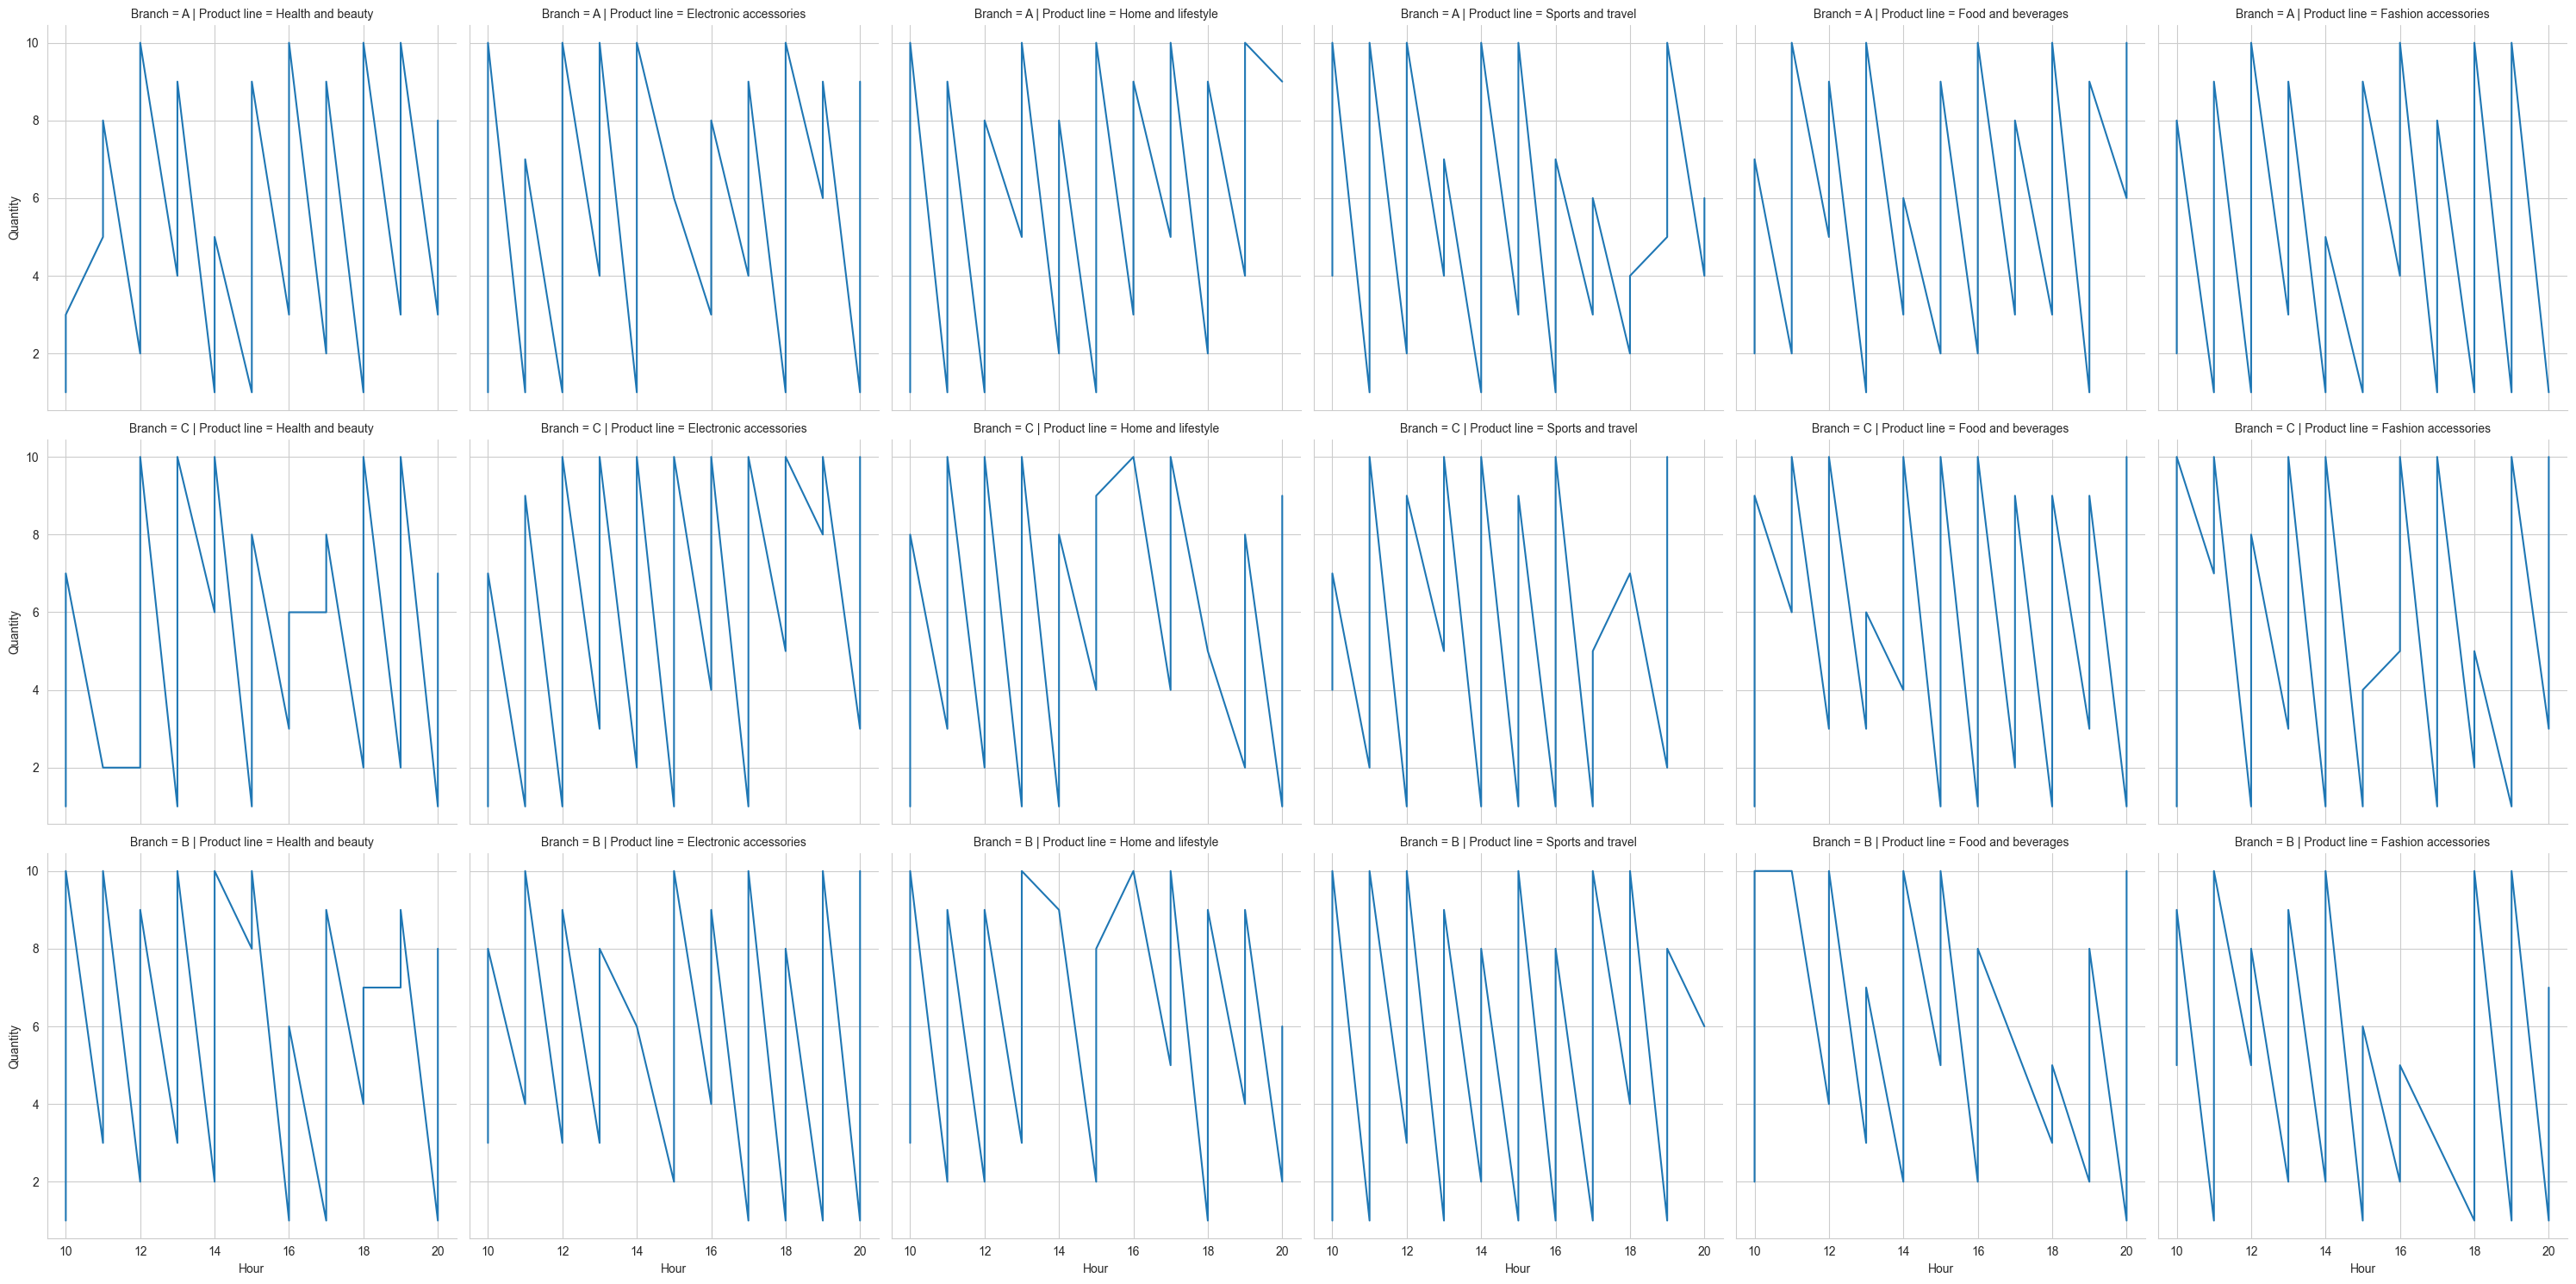

In [ ]:
productCount = sns.relplot(
    x="Hour",
    y="Quantity",
    col="Product line",
    row="Branch",
    estimator=None,
    kind="line",
    data=data_frame,
)

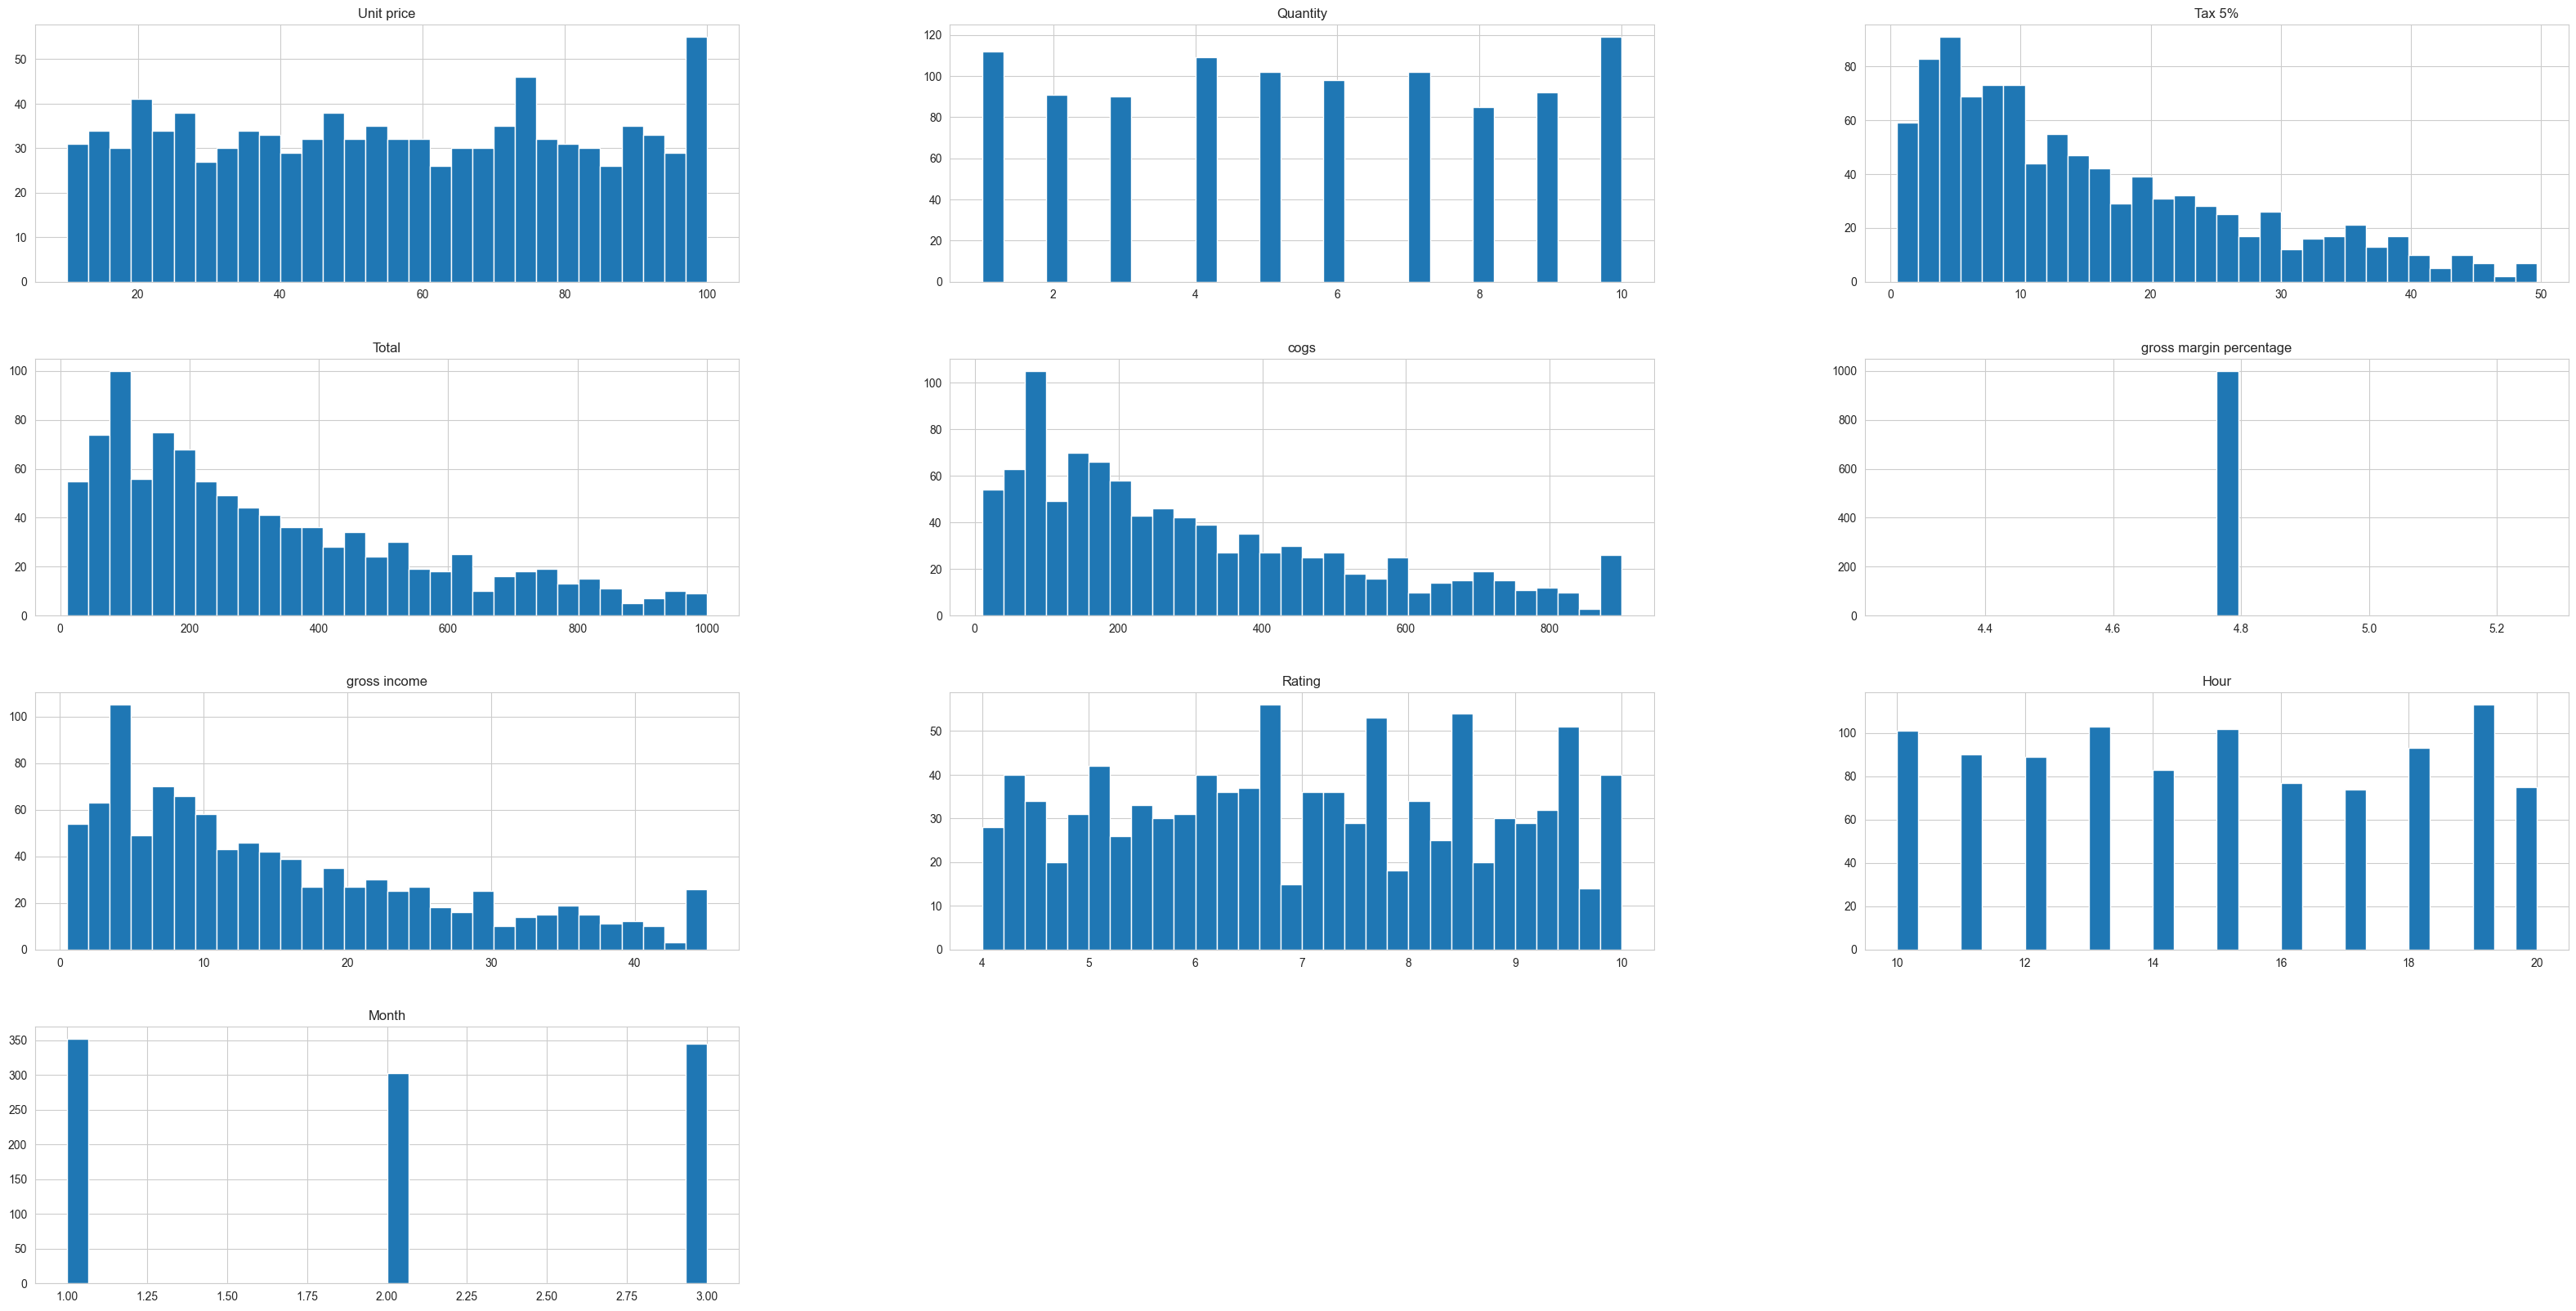

In [ ]:
data_frame.hist(bins=30, figsize=(40, 20))
plt.show()